<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Analyzing Where Do People Drink?

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

-   Be confident about your data analysis skills


This Dataset is from the story <a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/>  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains Average serving sizes per person such as average wine, spirit, beer servings. As well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings. See how to share your lab at the end.


You will need the following libraries:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl



<b>1.0 Importing the Data</b>


Load the csv:


In [2]:
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')


We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:


In [3]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<b>Question 1</b>:  Display the data types of each column using the attribute dtype.


In [4]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

<b>Question 2</b> use the method <code>groupby</code> to get the number of wine servings per continent:


In [5]:
wine_by_cont = df[['wine_servings','continent']]
wine_by_cont = wine_by_cont.groupby(['continent'], as_index=False).sum()
wine_by_cont.head()


,continent,wine_servings
0,Africa,862
1,Asia,399
2,Europe,6400
3,North America,564
4,Oceania,570


<b>Question 3:</b> Perform a statistical summary and analysis of beer servings for each continent:


In [6]:
beer_by_cont = df[['beer_servings','continent']]
beer_by_cont = beer_by_cont.groupby(['continent'], as_index=False).describe()
beer_by_cont.head()


beer_servings                                                          
          count        mean        std  min     25%    50%     75%    max
0          53.0   61.471698  80.557816  0.0   15.00   32.0   76.00  376.0
1          44.0   37.045455  49.469725  0.0    4.25   17.5   60.50  247.0
2          45.0  193.777778  99.631569  0.0  127.00  219.0  270.00  361.0
3          23.0  145.434783  79.621163  1.0   80.00  143.0  198.00  285.0
4          16.0   89.687500  96.641412  0.0   21.00   52.5  125.75  306.0

<b>Question 4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.


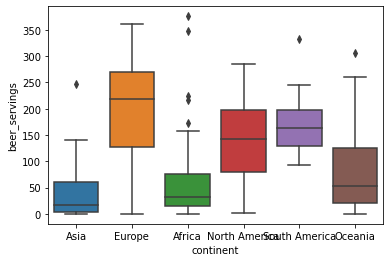

In [7]:
import seaborn as sns 
sns.boxplot(x="continent", y="beer_servings", data=df)

<b>Question 5</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is
negatively or positively correlated with the number of beer servings.


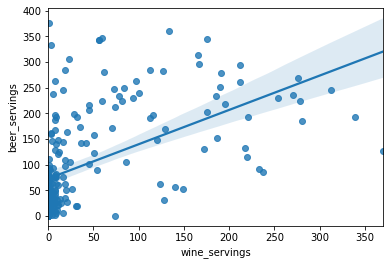

In [8]:
import seaborn as sns 
sns.regplot(x="wine_servings",y="beer_servings",data=df)


<b> Question 6:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'wine_servings'</code> then calculate $R^{2}$:


In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() 
x = df[["wine_servings"]]
y = df[["total_litres_of_pure_alcohol"]]
lm.fit(x,y)
print('Prediction =', lm.predict(y))
print('Rsquared =', lm.score(x,y) )

Prediction = [[3.15407943]
 [3.30895654]
 [3.17620474]
 [3.54601333]
 [3.34056411]
 [3.30895654]
 [3.41642228]
 [3.27418821]
 [3.48279819]
 [3.46067289]
 [3.19516928]
 [3.35320714]
 [3.21729458]
 [3.15407943]
 [3.35320714]
 [3.60922847]
 [3.48595894]
 [3.36901093]
 [3.18884776]
 [3.16672246]
 [3.27418821]
 [3.29947427]
 [3.32476032]
 [3.38165395]
 [3.17304398]
 [3.47963743]
 [3.289992  ]
 [3.35320714]
 [3.28050972]
 [3.28050972]
 [3.22361609]
 [3.33740335]
 [3.41326153]
 [3.21097306]
 [3.16672246]
 [3.39429698]
 [3.3121173 ]
 [3.28683124]
 [3.15724019]
 [3.20781231]
 [3.34056411]
 [3.29315275]
 [3.47647667]
 [3.28683124]
 [3.41326153]
 [3.52704879]
 [3.15407943]
 [3.22677685]
 [3.48279819]
 [3.18884776]
 [3.36268941]
 [3.35004638]
 [3.28683124]
 [3.16040095]
 [3.22361609]
 [3.33740335]
 [3.16988322]
 [3.45435137]
 [3.17620474]
 [3.21729458]
 [3.47015516]
 [3.52704879]
 [3.43538683]
 [3.22993761]
 [3.32476032]
 [3.511245  ]
 [3.21097306]
 [3.41642228]
 [3.53020954]
 [3.22361609]
 [3.160

<br>
<b>Note:</b> Please use <code>test_size = 0.10</code> in the following questions.


### Question 7

Use the list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data, using the provided code:


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

x_data = df[['beer_servings', 'spirit_servings', 'wine_servings']]
y_data = df[['total_litres_of_pure_alcohol']]
x_train,x_test,y_train,y_test = train_test_split (x_data, y_data, test_size = 0.10, random_state=0)
lm.fit(x_test,y_test)
print ('Rsquared=', lm.score(x_test,y_test)) 
print ('Y_pred=', lm.predict(x_test))

Rsquared= 0.7067463833426811
Y_pred= [[0.76807649]
 [4.69065931]
 [8.33367349]
 [0.87108672]
 [0.76807649]
 [1.9224773 ]
 [1.71760557]
 [1.84796081]
 [3.56233368]
 [3.65973944]
 [5.1842363 ]
 [6.98385926]
 [7.62202657]
 [4.56559638]
 [0.99946003]
 [5.77873785]
 [1.1538102 ]
 [5.1902773 ]
 [6.24028111]
 [2.04002572]]


<b>Question 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using. the test data. Take a screenshot of your code and the $R^{2}$. There are some hints in the notebook:


<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(input)
pipe.fit(x_train, y_train)
print ('Rsquared=', pipe.score(x_test,y_test))

 

Rsquared= 0.7076376133886035


<b>Question 9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the $R^{2}$ using the test data. Take a screenshot of your code and the $R^{2}$


In [18]:
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)

print ('Rsquared=', RidgeModel.score(x_test,y_test))


Rsquared= 0.699030454901918


<b>Question 10 </b>: Perform a 2nd order polynomial transform on both the training data and testing data.  Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. Take a screen-shot of your code and the $R^{2}$. 


In [26]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform (x_train)
x_test_pr = pr.fit_transform (x_test)
RidgeModel.fit(x_train_pr,y_train)
print ('Rsquared=', RidgeModel.score(x_test_pr,y_test))

Rsquared= 0.7076376228095799


<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html\" > CLICK HERE </a>  to see how to share your notebook


<b>Sources</b>


<a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/> Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?</a> by By Mona Chalabi , you can download the dataset <a href=https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption>here</a>.


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
